In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST REGRESSOR :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [2]:
#IMPORT THE DATA AS 'data'
data = pd.read_csv('/Data/car_data.csv')
data.shape

(2153, 21)

ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [3]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [4]:
# VIEWING THE DATA ONCE
data.shape

(2153, 26)

WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [5]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

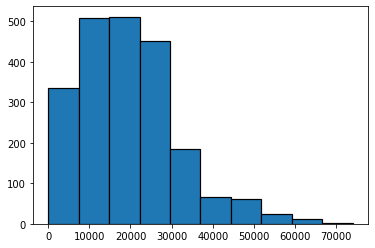

In [6]:
plt.figure(facecolor = 'w')
plt.hist(data['price'],edgecolor='black', linewidth=1.2);

IT IS RIGHT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

The Data['Price'] is skewed with :  0.9370149624905348


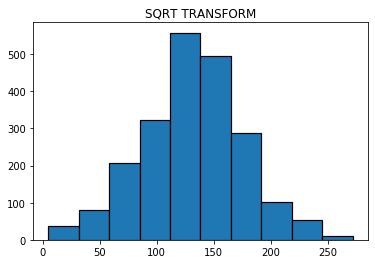

The sqrted Data['Price'] is skewed with :  -0.08882599743184214


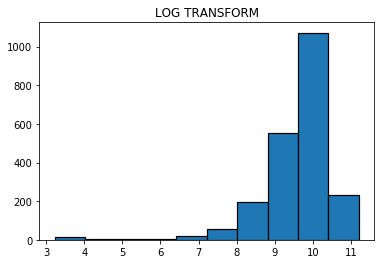

The logged Data['Price'] is skewed with :  -2.7563348651437454


In [7]:
#PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
print("The Data['Price'] is skewed with : ",data.price.skew())
plt.figure(facecolor = 'w')
plt.hist(np.sqrt(data['price']), edgecolor='black', linewidth=1.2);
plt.title('SQRT TRANSFORM');
plt.show()
print("The sqrted Data['Price'] is skewed with : ", np.sqrt(data['price']).skew())
plt.figure(facecolor = 'w')
plt.hist(np.log(data['price']), edgecolor='black', linewidth=1.2);
plt.title('LOG TRANSFORM');
plt.show()
print("The logged Data['Price'] is skewed with : ", np.log(data['price']).skew())
pass

CLEARLY SQRT TRANSFORM IS BETTER

In [8]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [9]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [10]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1722, 25)
(431, 25)
(1722,)
(431,)


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))

# CODE FOR MEAN SQUARE ERROR AND MEAN


# Start code
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
print("Linear Regression Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
# End code

print("\n")

Linear Regression Training R2 score is 0.3577935806672947
Linear Regression Testing R2 score is 0.3340597013410347
Linear Regression Training mean_square_error is 90997459.24037871
Linear Regression Testing mean_square_error is 93998879.06677724
Linear Regression Training mean_absolute_error is 6864.980505017777
Linear Regression Testing mean_absolute_error is 6926.987292556904




<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [12]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data


# START CODE
DecTreeModel = DecisionTreeRegressor(max_depth = 7, random_state = 1)
DecTreeModel.fit(X_train, y_train)

print("Decision Tree Training R2 score is " + str(r2_score(np.square(y_train),np.square(DecTreeModel.predict(X_train)))))
print("Decision Tree Testing R2 score is " + str(r2_score(np.square(y_test),np.square(DecTreeModel.predict(X_test)))))

# CODE FOR MEAN SQUARE ERROR AND MEAN


# Start code
print("Decision Tree Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(DecTreeModel.predict(X_train)))))
print("Decision Tree Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(DecTreeModel.predict(X_test)))))
print("Decision Tree Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(DecTreeModel.predict(X_train)))))
print("Decision Tree Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(DecTreeModel.predict(X_test)))))

# END CODE

Decision Tree Training R2 score is 0.422869230755335
Decision Tree Testing R2 score is 0.36145560633416207
Decision Tree Training mean_square_error is 81776562.90835412
Decision Tree Testing mean_square_error is 90131889.2396716
Decision Tree Training mean_absolute_error is 6266.244817595775
Decision Tree Testing mean_absolute_error is 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [13]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
SVModel = SVR(kernel = 'poly', degree = 2 , max_iter = 3000, C = 0.1)
SVModel.fit(X_train, y_train)
print("SVM Training R2 score is " + str(r2_score(np.square(y_train),np.square(SVModel.predict(X_train)))))
print("SVM Testing R2 score is " + str(r2_score(np.square(y_test),np.square(SVModel.predict(X_test)))))
print("SVM Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(SVModel.predict(X_train)))))
print("SVM Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(SVModel.predict(X_test)))))
print("SVM Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(SVModel.predict(X_train)))))
print("SVM Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(SVModel.predict(X_test)))))
# END CODE

SVM Training R2 score is -21.378337117720697
SVM Testing R2 score is 0.0879391173112708
SVM Training mean_square_error is 3170899197.5713468
SVM Testing mean_square_error is 128739319.10418974
SVM Training mean_absolute_error is 9831.444528754593
SVM Testing mean_absolute_error is 8348.703212635415


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [14]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 

# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

# START CODE
RFModel = RandomForestRegressor(n_estimators = 200, max_depth = 9, n_jobs = -1, random_state = 1)
RFModel.fit(X_train, y_train)
print("RF Training R2 score is " + str(r2_score(np.square(y_train),np.square(RFModel.predict(X_train)))))
print("RF Testing R2 score is " + str(r2_score(np.square(y_test),np.square(RFModel.predict(X_test)))))
print("RF Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(RFModel.predict(X_train)))))
print("RF Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(RFModel.predict(X_test)))))
print("RF Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(RFModel.predict(X_train)))))
print("RF Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(RFModel.predict(X_test)))))
# END CODE

RF Training R2 score is 0.5524364393379151
RF Testing R2 score is 0.3997413290406362
RF Training mean_square_error is 63417533.12143005
RF Testing mean_square_error is 84727778.65210524
RF Training mean_absolute_error is 5528.669046457424
RF Testing mean_absolute_error is 6695.668840563837


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [15]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [16]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1


In [17]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [20]:
print(X_test.shape)
print(X_train.shape)

(431, 25)
(1722, 25)


In [21]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1 
# FIT Logistic Regression ON TRAINING DATA
# CODE to FIND THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR LOGISTIC REGRESSION
# IMPORTED CONFUSION MATRIX
# START CODE
Logreg = LogisticRegression(solver = 'lbfgs', max_iter = 2000, C = 0.5, random_state = 1, penalty='l2')
Logreg.fit(X_train,y_train)
y_predicted = Logreg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm,columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
cm_df
TP = cm_df['Predicted Positive']['Actual Positive']
TN = cm_df['Predicted Negative']['Actual Negative']
FP = cm_df['Predicted Positive']['Actual Negative']
FN = cm_df['Predicted Negative']['Actual Positive']
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
FPR = FP/(TN + FP)
Senstivity = TPR
Specificity = TN/(TN + FP) 
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('True Positive Rate :', TPR)
print('True Negative Rate :', TNR)
print('False Positive Rate :', FPR)
print('Senstivity : ', Senstivity)
print('Specificity : ', Specificity)
print('Accuracy : ', Accuracy)
# END CODE

True Positive Rate : 0.6542553191489362
True Negative Rate : 0.7736625514403292
False Positive Rate : 0.22633744855967078
Senstivity :  0.6542553191489362
Specificity :  0.7736625514403292
Accuracy :  0.7215777262180975


In [22]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
# FIT SVM ON TRAINING DATA
# FINDING THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR SVM
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
from sklearn.svm import SVC
SVCModel1 = SVC(kernel = 'rbf', max_iter = 1000, gamma='scale')
SVCModel1.fit(X_train,y_train)
y_predicted = SVCModel1.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm,columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
cm_df
TP = cm_df['Predicted Positive']['Actual Positive']
TN = cm_df['Predicted Negative']['Actual Negative']
FP = cm_df['Predicted Positive']['Actual Negative']
FN = cm_df['Predicted Negative']['Actual Positive']
TPR = TP/(TP + FN)
FPR = FP/(TN + FP)
Senstivity = TPR
Specificity = TN/(TN + FP) 
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('True Positive Rate :', TPR)
print('False Positive Rate :', FPR)
print('Senstivity : ', Senstivity)
print('Specificity : ', Specificity)
print('Accuracy : ', Accuracy)
# END CODE

True Positive Rate : 0.5372340425531915
False Positive Rate : 0.13991769547325103
Senstivity :  0.5372340425531915
Specificity :  0.8600823045267489
Accuracy :  0.7192575406032483


In [23]:
# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
# FIT Decision Tree ON TRAINING DATA
# FINDING THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Decision Tree
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
from sklearn.tree import DecisionTreeClassifier
DecTreeModel1 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3, random_state = 1)
DecTreeModel1.fit(X_train,y_train)
y_predicted = DecTreeModel1.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm,columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
cm_df
TP = cm_df['Predicted Positive']['Actual Positive']
TN = cm_df['Predicted Negative']['Actual Negative']
FP = cm_df['Predicted Positive']['Actual Negative']
FN = cm_df['Predicted Negative']['Actual Positive']
TPR = TP/(TP + FN)
FPR = FP/(TN + FP)
Senstivity = TPR
Specificity = TN/(TN + FP) 
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('True Positive Rate :', TPR)
print('False Positive Rate :', FPR)
print('Senstivity : ', Senstivity)
print('Specificity : ', Specificity)
print('Accuracy : ', Accuracy)
# END CODE

True Positive Rate : 0.5638297872340425
False Positive Rate : 0.11522633744855967
Senstivity :  0.5638297872340425
Specificity :  0.8847736625514403
Accuracy :  0.7447795823665894


In [24]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
# FIT RANDOM FOREST ON TRAINING DATA
# FINDING THE TPR, FPR, SENSTIVITY, SPECIFICITY, ACCURACY FOR Random Forest
# USE THE IMPORTED CONFUSION MATRIX

# START CODE
from sklearn.ensemble import RandomForestClassifier
RFCModel1 = RandomForestClassifier(n_estimators = 100, criterion= 'gini' , max_depth = 3, random_state = 1)
RFCModel1.fit(X_train,y_train)
y_predicted = RFCModel1.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm_df = pd.DataFrame(cm,columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])
cm_df
TP = cm_df['Predicted Positive']['Actual Positive']
TN = cm_df['Predicted Negative']['Actual Negative']
FP = cm_df['Predicted Positive']['Actual Negative']
FN = cm_df['Predicted Negative']['Actual Positive']
TPR = TP/(TP + FN)
FPR = FP/(TN + FP)
Senstivity = TPR
Specificity = TN/(TN + FP) 
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print('True Positive Rate :', TPR)
print('False Positive Rate :', FPR)
print('Senstivity : ', Senstivity)
print('Specificity : ', Specificity)
print('Accuracy : ', Accuracy)
# END CODE

True Positive Rate : 0.5638297872340425
False Positive Rate : 0.11934156378600823
Senstivity :  0.5638297872340425
Specificity :  0.8806584362139918
Accuracy :  0.7424593967517401
